# Machine Learning Continuous Assessment 2.
Student Name: Pradeep Gahlawat (10524011)


## Local Development Corporations Loans DataSet.


Data Source: https://data.ny.gov/Transparency/Local-Development-Corporations-Loans/vp83-gfyz <br>

Data is Provided by Individual Local Development Corporations submitted to Authorities Budget Office.
The dataset consists of loans data reported by Local Development Corporations beginning with fiscal years ending in 2011..<br>


Number of columns: 18<br>
Number of records: 12,042<br>


Attribute Information:

1.  Authority Name: Name of the Public Authority  
2.  Fiscal Year End Date: Date of Fiscal Year end for the Authority
3.  Loan Purpose: Indicates the purpose of the loan.
4.  Loan Fund Sources: Indicates whether the funds for the loan were federal, state, municipal, not for profit, private, or other.
5.  Recipient Name: Name of the recipient of the loan
6.  Recipient City: City of the recipient of the loan
7.  Recipient State: State of the recipient of the loan
8.  Recipient Postal Code: Zip code of the recipient of the loan
9.  Date Loan Awarded: Date the loan was awarded
10. Original Loan Amount: Original amount of the loan
11. Interest Rate: Interest rate of the loan as a percentage.
12. Loan Length: Number of years to repay loan
13. Amount Repaid: Amount of the loan that was repaid as of the end of the fiscal year.
14. New Jobs: Yes/No field that indicates if the loan was expected to result in new jobs being created.
15. Loans: No indicates that the authority reported having no outstanding loans during the fiscal year. All the remaining fields are     blank when an authority reported having no outstanding loans. This field is blank if loan information is being reported.
16. Jobs Planned: Number of jobs planned to be created as a result of the loan. This field is blank if the authority indicated that       the loan was not expected to result in new jobs being created or if there were no loans.
17. Jobs Created: Number of jobs created as a result of the loan. This field is blank if the authority indicated that the loan was       not expected to result in new jobs being created or if there were no loans.
18. Loan Terms Completed: Yes/No field that indicates if the terms of the loan were completed.


#### Objective:
Given a set of information, determine whether the Loan term will be completed or not?


# 1) Reading Data

In [1]:
# Import required libraries and packages.
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import plotly.figure_factory as ff
import plotly.offline as offline
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

Dataset is available in following formats.
1. CSV
2. TSV
3. XML
4. RDF

We will import it in csv format.

In [2]:
# Load the dataset and convert it into a pandas dataframe object.
df = pd.read_csv('ldcl.csv')

# Eliminate white space in dataframe header and replace by '_'
df.columns = df.columns.str.replace(' ','_')

# print the first 5 rows of the dataframe.
df.head()

,Authority_Name,Fiscal_Year_End_Date,Loans,Loan_Fund_Sources,Recipient_Name,Recipient_City,Recipient_State,Recipient_Postal_Code,Date_Loan_Awarded,Original_Loan_Amount,Interest_Rate,Loan_Length,Amount_Repaid,Loan_Purpose,New_Jobs,Jobs_Planned,Jobs_Created,Loan_Terms_Completed
0,"ATC of Buffalo and Erie County, Inc.",12/31/2011,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albany CSO Pool Communities Corporation,9/30/2016,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albany CSO Pool Communities Corporation,9/30/2017,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albany CSO Pool Communities Corporation,9/30/2018,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albany County Business Development Corporation,12/31/2011,NaN,Federal,135 Mohawk Street LLC,TROY,NY,12180.0,10/8/2009,100000.0,4.0,5.0,10580.1,Commercial Property Construction/Acquisition/R...,Yes,10.0,0.0,No


In [3]:
# Print the high level info of our dataframe including null value count and Dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12042 entries, 0 to 12041
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Authority_Name         12042 non-null  object 
 1   Fiscal_Year_End_Date   12042 non-null  object 
 2   Loans                  1348 non-null   object 
 3   Loan_Fund_Sources      10694 non-null  object 
 4   Recipient_Name         10694 non-null  object 
 5   Recipient_City         10694 non-null  object 
 6   Recipient_State        10694 non-null  object 
 7   Recipient_Postal_Code  10694 non-null  float64
 8   Date_Loan_Awarded      10694 non-null  object 
 9   Original_Loan_Amount   10694 non-null  float64
 10  Interest_Rate          10694 non-null  float64
 11  Loan_Length            10694 non-null  float64
 12  Amount_Repaid          10694 non-null  float64
 13  Loan_Purpose           10694 non-null  object 
 14  New_Jobs               10694 non-null  object 
 15  Jo

In [4]:
# Check number of null values in each column.
df.isna().sum()

Authority_Name               0
Fiscal_Year_End_Date         0
Loans                    10694
Loan_Fund_Sources         1348
Recipient_Name            1348
Recipient_City            1348
Recipient_State           1348
Recipient_Postal_Code     1348
Date_Loan_Awarded         1348
Original_Loan_Amount      1348
Interest_Rate             1348
Loan_Length               1348
Amount_Repaid             1348
Loan_Purpose              1348
New_Jobs                  1348
Jobs_Planned              6911
Jobs_Created              6935
Loan_Terms_Completed      1348
dtype: int64

<b>Observations:</b> 
1. Loans data has almost 80% missing values. (reason stated in attribute information)
2. Jobs Planned and Jobs Created has 6911 missing values because of Loans columns. we will replace nan by 0 in these columns.

# 2) Data Preprocessing

In [5]:
# Get total number of unique values in Authority_Name feature.
print(len(pd.value_counts(df.Authority_Name)))

# Get unique values counts .
df.Authority_Name.value_counts()

304


Catskill Watershed Corporation                              924
City of Watertown Local Development Corporation             767
Albany County Business Development Corporation              741
Buffalo and Erie County Regional Development Corporation    698
Columbia Economic Development Corporation                   515
                                                           ... 
The Hamilton County Local Development Corporation             1
Village of Lancaster Community Development Corporation        1
Greater Mohawk Valley Land Bank Corporation                   1
BURA INC                                                      1
Niagara Orleans Land Improvement Corporation                  1
Name: Authority_Name, Length: 304, dtype: int64

In [6]:
'''
   We will remove following columns.
   
   Authority Name and Recipient_Name:  As name variable has no relation to the loan repayment.
   Recipient_City and Recipient_State:  As we have postal codes for geo locations.
   Loans: Other columns only has a value if it has a missing value. Hense more than 80% values are missing.  
     
'''
# Drop listed columns.
df = df.drop(['Authority_Name',
              'Loans',
              'Recipient_Name',
              'Recipient_City',
              'Recipient_State',], axis = 'columns')

In [7]:
# Convert dtype of the Fiscal_Year_End_Date feature from Object to datetime.
df.Fiscal_Year_End_Date = pd.to_datetime(df.Fiscal_Year_End_Date)
print (df.Fiscal_Year_End_Date.dtype)

# Create two new columns containing month and year of the fiscal date. We exclude day which is common (31) for all entries. 
df['Fiscal_End_Year'] = df.Fiscal_Year_End_Date.dt.year
df['Fiscal_End_Month'] = df.Fiscal_Year_End_Date.dt.month

# Convert dtype of the Date_Loan_Awarded feature from Object to datetime.
df.Date_Loan_Awarded = pd.to_datetime(df.Date_Loan_Awarded)
print (df.Date_Loan_Awarded.dtype)

# Create three new columns containing day, month and year of the date when loan was awarded.
df['Loan_Awarded_Year'] = df.Date_Loan_Awarded.dt.year
df['Loan_Awarded_Month'] = df.Date_Loan_Awarded.dt.month
df['Loan_Awarded_Day'] = df.Date_Loan_Awarded.dt.day

# Remove original date columns.
df = df.drop( ['Fiscal_Year_End_Date',
               'Date_Loan_Awarded'], axis = 'columns')


datetime64[ns]
datetime64[ns]


In [8]:
df.Loan_Purpose.value_counts()

Business Expansion/Startup                                                  4643
Commercial Property Construction/Acquisition/Revitalization/Improvement     3845
Equipment and Fixed Asset Acquisition                                       1590
Residential Property Construction/Acquisition/Rehabilitation/Improvement     381
Land Acquisition/Development /Infrastructure Costs (i.e., Water/Sewer)       115
Land Preservation/Resource Conservation/Recreation                            63
Marketing and Business Recruitment                                            39
Education/Training(Business Development)                                      18
Name: Loan_Purpose, dtype: int64

In [9]:
# Change the dtype of Loan_Fund_Sources feature to string as required by LabelEncoder.
df.Loan_Fund_Sources = df.Loan_Fund_Sources.astype(str)

# Create an instance of LabelEncoder object.
lfs_le = LabelEncoder()

# Transform Loan_Fund_Sources feature into numeric labels.
lfs_labels = lfs_le.fit_transform(df.Loan_Fund_Sources)
df.Loan_Fund_Sources = lfs_labels

# Create an instance of OneHotEncoder object.
lfs_ohe = OneHotEncoder()

# Encode Loan_Fund_Sources labels into array using one-hot encoding scheme.
lfs_feature_arr = lfs_ohe.fit_transform(df[['Loan_Fund_Sources']]).toarray()

# Create meaningful header for one-hot encoded features.
lfs_feature_labels = ['LFS_'+str(cls_label) for cls_label in lfs_le.classes_]
lfs_features = pd.DataFrame(lfs_feature_arr, columns=lfs_feature_labels)

# Merge new features with existing dataframe and drop original column.
df = pd.concat([df, lfs_features], axis=1, sort=False)
df = df.drop('Loan_Fund_Sources',axis = 1)

In [10]:
# Get one hot encoding of columns Loan_Purpose.
one_hot = pd.get_dummies(df['Loan_Purpose'])

# Drop column BORO as it is now encoded
df = df.drop('Loan_Purpose',axis = 1)

# Join the encoded df
df = df.join(one_hot)

# Manually Rename new columns as they are long strings and Using prefix attribute is not a good option.
df=df.rename(columns = {'Business Expansion/Startup':'Loan_Purpose_0',
                        'Commercial Property Construction/Acquisition/Revitalization/Improvement':'Loan_Purpose_1',
                        'Education/Training(Business Development)':'Loan_Purpose_2',
                        'Equipment and Fixed Asset Acquisition':'Loan_Purpose_3',
                        'Land Acquisition/Development /Infrastructure Costs (i.e., Water/Sewer)':'Loan_Purpose_4',
                        'Land Preservation/Resource Conservation/Recreation':'Loan_Purpose_5',
                        'Marketing and Business Recruitment':'Loan_Purpose_6',
                        'Residential Property Construction/Acquisition/Rehabilitation/Improvement':'Loan_Purpose_7'})

In [11]:
df.columns

Index(['Recipient_Postal_Code', 'Original_Loan_Amount', 'Interest_Rate',
       'Loan_Length', 'Amount_Repaid', 'New_Jobs', 'Jobs_Planned',
       'Jobs_Created', 'Loan_Terms_Completed', 'Fiscal_End_Year',
       'Fiscal_End_Month', 'Loan_Awarded_Year', 'Loan_Awarded_Month',
       'Loan_Awarded_Day', 'LFS_Federal', 'LFS_Municipal',
       'LFS_Not for Profit', 'LFS_Other', 'LFS_Private', 'LFS_State',
       'LFS_nan', 'Loan_Purpose_0', 'Loan_Purpose_1', 'Loan_Purpose_2',
       'Loan_Purpose_3', 'Loan_Purpose_4', 'Loan_Purpose_5', 'Loan_Purpose_6',
       'Loan_Purpose_7'],
      dtype='object')

In [12]:
# Replace NaN values with '0' as no new job was intended.
df['Jobs_Planned'].fillna(0, inplace=True)
df['Jobs_Created'].fillna(0, inplace=True)

In [13]:
# Map Binomial categorical features to binary (0,1) .
df['New_Jobs'] = df['New_Jobs'].map({'No': 0,'Yes': 1})
df['Loan_Terms_Completed'] = df['Loan_Terms_Completed'].map({'No': 0,'Yes': 1})

In [14]:
# Drop 1348 empty records, caused by Loan feature.
# We excluded jobs created and jobs planned feature as we will try to impute them after exploration.
df = df.dropna(subset = ['Recipient_Postal_Code', 'Original_Loan_Amount','Interest_Rate',
                         'Loan_Length', 'New_Jobs', 'Amount_Repaid', 'Loan_Terms_Completed'])  

# Drop LFS_nan coumns as it only has value 'o'
df = df.drop('LFS_nan', axis = 'columns')

# 3) Feature-target relationship and distribution check. 

In [15]:
# check the correlation between all features and independent variable.
df[df.columns[1:]].corr()['Loan_Terms_Completed'][:]

Original_Loan_Amount    0.012278
Interest_Rate           0.028244
Loan_Length            -0.071356
Amount_Repaid           0.109914
New_Jobs                0.035825
Jobs_Planned            0.018229
Jobs_Created            0.021930
Loan_Terms_Completed    1.000000
Fiscal_End_Year         0.031651
Fiscal_End_Month        0.005875
Loan_Awarded_Year      -0.084901
Loan_Awarded_Month     -0.018971
Loan_Awarded_Day        0.002256
LFS_Federal             0.021160
LFS_Municipal           0.038478
LFS_Not for Profit     -0.067210
LFS_Other               0.016629
LFS_Private             0.009214
LFS_State               0.004336
Loan_Purpose_0          0.030452
Loan_Purpose_1         -0.059286
Loan_Purpose_2          0.001156
Loan_Purpose_3          0.033467
Loan_Purpose_4          0.024980
Loan_Purpose_5          0.064394
Loan_Purpose_6         -0.000432
Loan_Purpose_7         -0.032780
Name: Loan_Terms_Completed, dtype: float64

<b>Observations:</b>
1. Amount repaid is highly correlated with our independent variable.
2. LFS_State, LFS_Private, Loan_Purpose_6, Loan_Purpose_2 do not have much relation with independent variable.

In [16]:
# There is no need to check multicollinearity as boosting algorithms are unaffected by multi-collinearity.
# But it is a good practice to remove features that has no correlation with independent variable.
# Drop listed columns.
df = df.drop(['Loan_Purpose_6',
              'Loan_Purpose_2',
              'LFS_State',
              'LFS_Private'], axis = 'columns')

In [17]:
# Check the skewness of each column.
skew_data = df.skew()
print(skew_data)

Recipient_Postal_Code    16.358089
Original_Loan_Amount     12.262324
Interest_Rate            -0.145729
Loan_Length               4.342486
Amount_Repaid            18.767646
New_Jobs                  0.090999
Jobs_Planned             63.281333
Jobs_Created             10.114736
Loan_Terms_Completed      1.891711
Fiscal_End_Year          -0.051264
Fiscal_End_Month         -2.743042
Loan_Awarded_Year        -1.628226
Loan_Awarded_Month       -0.039070
Loan_Awarded_Day          0.077430
LFS_Federal               0.193179
LFS_Municipal             3.438952
LFS_Not for Profit        1.247782
LFS_Other                 2.256200
Loan_Purpose_0            0.265675
Loan_Purpose_1            0.585463
Loan_Purpose_3            1.975229
Loan_Purpose_4            9.488279
Loan_Purpose_5           12.915059
Loan_Purpose_7            5.011210
dtype: float64


## 4) Splitting and Scalling data.

In [18]:
# Separate input features and target
Y = df.Loan_Terms_Completed
X = df.drop('Loan_Terms_Completed', axis = 'columns')

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=36)
from sklearn.preprocessing import StandardScaler
# Create an instance of standardscaler
sc = StandardScaler()

# Scale data to have mean 0  and std of 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(8555, 23) (8555,)
(2139, 23) (2139,)


In [19]:
# https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
# count examples in each class
counter = Counter(Y_train)
# estimate scale_pos_weight value for XGBoost classifier (to deal imbalanced data)
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.403


## 5) Modelling and Evaluation.

In [20]:
# Set the parameter grid values for hyperparameter tunning
param_grid = {'n_estimators': [10, 50, 100, 500, 700],
              'max_depth': [1, 2, 5, 10, 50] }

# Create an instance of XGBoost classifier
clf = XGBClassifier(learning_rate=0.1, booster='gbtree',
                    scale_pos_weight = 5.403, n_jobs=1)

# Create an instance of RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Put all the attributes into gridsearchcv to find best parameters
clf_grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = cv,
                        n_jobs=-1, scoring='roc_auc', refit=True, return_train_score=True)
 
# fit X_train on clf_grid    
%time clf_grid.fit(X_train, Y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("==========================================================") 

print("1. Best Parameters :\n",clf_grid.best_estimator_)
print("2. AUC value of the model :",clf_grid.score(X_test, Y_test))

Wall time: 17min 55s

 Results from Grid Search 
1. Best Parameters :
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=5.403, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)
2. AUC value of the model : 0.9388266252136598


In [21]:
# Get Optimal depth and minimum samples split values.
Optimal_depth = clf_grid.best_estimator_.max_depth
n_estimators = clf_grid.best_estimator_.n_estimators
print("3. The optimal value of max_depth is : ",Optimal_depth)
print("3. The optimal value of min_samples_split is : ",n_estimators)

3. The optimal value of max_depth is :  10
3. The optimal value of min_samples_split is :  500


In [22]:
# Compute train and cross-validation AUC score.
train_auc = clf_grid.cv_results_['mean_train_score']
cv_auc = clf_grid.cv_results_['mean_test_score']

print('Train AUC values: \n', train_auc)
print('CV AUC values: \n', cv_auc)

Train AUC values: 
 [0.69156674 0.78668797 0.81870686 0.8642619  0.86886735 0.83712609
 0.87154127 0.89410532 0.94820853 0.95834681 0.91456461 0.96773144
 0.9841487  0.99977436 0.99997908 0.99064461 0.99949776 0.99998559
 1.         1.         0.99808819 0.99999464 1.         1.
 1.        ]
CV AUC values: 
 [0.68557072 0.7784641  0.80645352 0.84599821 0.84880656 0.82858465
 0.85557388 0.87362632 0.91527671 0.92263821 0.88394035 0.92466524
 0.93323825 0.94010798 0.94079977 0.92497448 0.9358855  0.93929266
 0.94112779 0.94087837 0.92311997 0.93544462 0.93882246 0.94020425
 0.9401339 ]


In [23]:
# Create a dataframe to be used for heat-map
hyperparameters = clf_grid.cv_results_["params"]
df1 = pd.DataFrame(hyperparameters)
df1['mean_test_score'] = cv_auc
df1['mean_train_score'] = train_auc

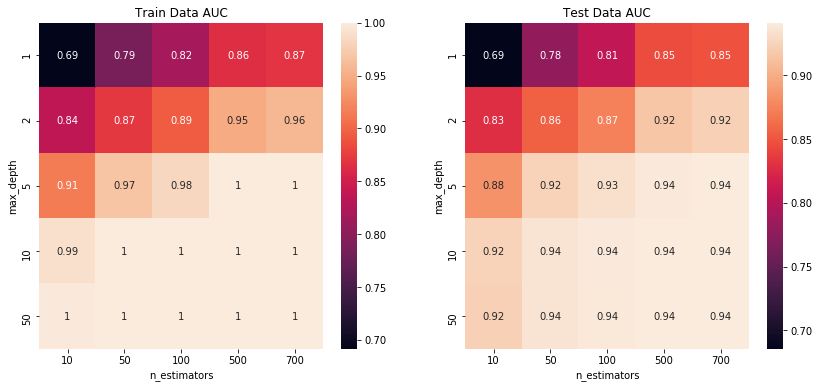

In [24]:
# Heat-map for train and cv auc values.
pivot_train = df1.pivot(index = 'max_depth', columns = 'n_estimators', values = 'mean_train_score')
pivot_cv = df1.pivot(index = 'max_depth', columns = 'n_estimators', values = 'mean_test_score')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
ax1.set_title('Train Data AUC')
ax2.set_title('Test Data AUC')
sns.heatmap(pivot_train, annot=True, ax=ax1)
sns.heatmap(pivot_cv, annot=True, ax=ax2)
plt.show()

In [25]:
# Fit XGBClassifier on train data with best parameters. 
clf =  XGBClassifier(max_depth=Optimal_depth, n_estimators=n_estimators, learning_rate=0.1, booster='gbtree', n_jobs=1)
%time clf.fit(X_train, Y_train)

Wall time: 12.7 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

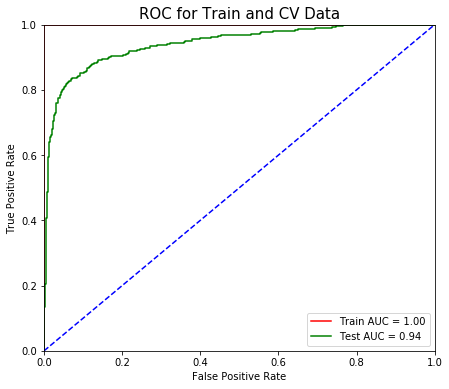

In [26]:
# ROC curve for cv & train data set
Y_test_predicted = clf.predict_proba(X_test)[:,1]
Y_train_predicted = clf.predict_proba(X_train)[:,1]

plt.figure(figsize=(7,6))
fpr, tpr, threshold = roc_curve(Y_train, Y_train_predicted)
roc_auc_train = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'Train AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')

fpr, tpr, threshold = roc_curve(Y_test, Y_test_predicted)
roc_auc_test = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'Test AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'b--')
plt.title('ROC for Train and CV Data', size = 15)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [27]:
# Generate Classification report for X_test
Y_test_predicted = clf.predict(X_test)
Y_train_predicted = clf.predict(X_train)

print(classification_report(Y_test, Y_test_predicted))
print('_'*80)
acc = accuracy_score(Y_test, Y_test_predicted)*100
print('Accuracy is = %0.3f' % acc)

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1802
         1.0       0.83      0.72      0.77       337

    accuracy                           0.93      2139
   macro avg       0.89      0.85      0.87      2139
weighted avg       0.93      0.93      0.93      2139

________________________________________________________________________________
Accuracy is = 93.315


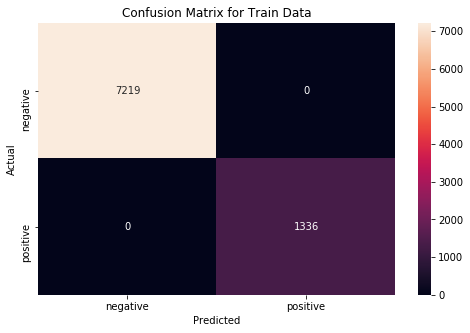

Sensitivity for Train data is : 100.000000
Specificity for Train data is : 100.000000


In [28]:
# Confusion matrices with heat map
conf_matrix_train = confusion_matrix(Y_train, Y_train_predicted)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(conf_matrix_train, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,5))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute Sensitivity and Specificity on Train data.
TN = conf_matrix_train[0,0]  
FP = conf_matrix_train[0,1]
FN = conf_matrix_train[1,0]  
TP = conf_matrix_train[1,1]

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = TP/(TP+FN)*100
# Specificity or true negative rate
Specificity = TN/(TN+FP)*100

print("Sensitivity for Train data is : %f" %(Sensitivity))
print("Specificity for Train data is : %f" %(Specificity))

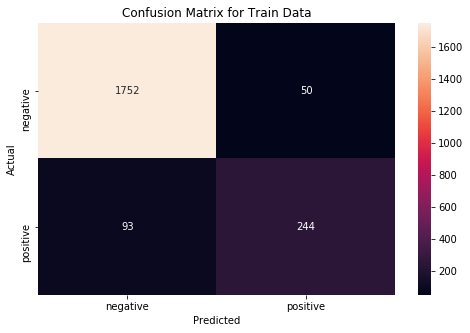

Sensitivity for Train data is : 72.403561
Specificity for Train data is : 97.225305


In [29]:
# Confusion matrices with heat map
conf_matrix_train = confusion_matrix(Y_test, Y_test_predicted)
class_label = ['negative', 'positive']
df_conf_matrix = pd.DataFrame(conf_matrix_train, index=class_label, columns=class_label)
fig = plt.figure(figsize=(8,5))
sns.heatmap(df_conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute Sensitivity and Specificity on Train data.
TN = conf_matrix_train[0,0]  
FP = conf_matrix_train[0,1]
FN = conf_matrix_train[1,0]  
TP = conf_matrix_train[1,1]

# Sensitivity, hit rate, recall, or true positive rate
Sensitivity = TP/(TP+FN)*100
# Specificity or true negative rate
Specificity = TN/(TN+FP)*100

print("Sensitivity for Train data is : %f" %(Sensitivity))
print("Specificity for Train data is : %f" %(Specificity))